In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [5]:
train_data = df[['last_evaluation', 'average_montly_hours', 'satisfaction_level', 'number_project', 'time_spend_company']]

pandas.core.frame.DataFrame

In [7]:
import warnings
warnings.filterwarnings('ignore')

min_max_scaler = preprocessing.MinMaxScaler()
for k in train_data.columns:
    train_data[k] = min_max_scaler.fit_transform(train_data[k].reshape(-1, 1).astype(float))
    
train_data.describe()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


,last_evaluation,average_montly_hours,satisfaction_level,number_project,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.556409,0.490889,0.574542,0.360611,0.187279
std,0.267452,0.233379,0.273220,0.246518,0.182517
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312500,0.280374,0.384615,0.200000,0.125000
50%,0.562500,0.485981,0.604396,0.400000,0.125000
75%,0.796875,0.696262,0.802198,0.600000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#First let's try with people who left, helped by 3D scatter plot
train_left = train_data[df['left'] == 1]
#we should have 3 clusters

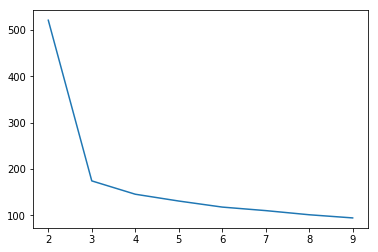

In [6]:
sse_list = list()
max_k = 10
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_left)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [7]:
#yesss clearly 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(train_left)
print ('silhouette =', silhouette_score(train_left, kmeans.labels_), '\nsse =', kmeans.inertia_)
#high silhouette, low SSE

silhouette = 0.733232507212 
sse = 174.257576546


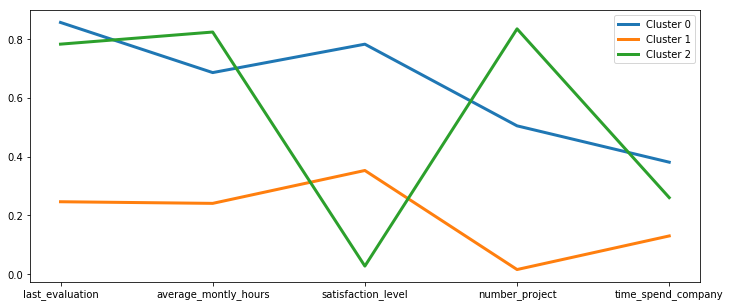

In [8]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(12, 5))
for i in range(0, 3):
    plt.plot(range(0, 5), centers[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 5), list(train_left.columns))
plt.legend()
plt.show()
#cluster 0 = hard workers: low satisfaction, too many hours and project
#cluster 1 = lazy boys: everything is low
#cluster 2 = too good workers: high evaluation and satisfaction but left

In [9]:
df_cluster_left = df[df['left'] == 1]
df_cluster_left['labels'] = kmeans.labels_
print(df_cluster_left['labels'].value_counts())
print(df_cluster_left['labels'].value_counts()/len(df_cluster_left))

1    1620
0     993
2     958
Name: labels, dtype: int64
1    0.453654
0    0.278073
2    0.268272
Name: labels, dtype: float64


In [10]:
for coloumn in ['sales', 'salary', 'Work_accident', 'promotion_last_5years']:
    print('\t'+ coloumn +':')
    for value in set(df_cluster_left[coloumn]):
        print(str(value) +':')
        print(len(df_cluster_left[df_cluster_left[coloumn] == value]), 'on', len(df_cluster_left), '---> '+str(len(df_cluster_left[df_cluster_left[coloumn] == value])/len(df_cluster_left))+'%')
        print('REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)')
        print(df_cluster_left[df_cluster_left[coloumn] == value]['labels'].value_counts()/len(df_cluster_left[df_cluster_left[coloumn] == value]), '\n')
    print('-----------------------------------------------------------------------')
    
# I'm trying to compare percentages 
# for examples managment has 32% in cluster 2 (too good workers) instead of 27% and 24% instead of 28% in cluster 0 (good workers)
#etc

	sales:
accounting:
204 on 3571 ---> 0.05712685522262671%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.470588
2    0.323529
0    0.205882
Name: labels, dtype: float64 

RandD:
121 on 3571 ---> 0.03388406608793055%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.404959
2    0.305785
0    0.289256
Name: labels, dtype: float64 

sales:
1014 on 3571 ---> 0.28395407448893867%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.486193
0    0.273176
2    0.240631
Name: labels, dtype: float64 

IT:
273 on 3571 ---> 0.0764491739008681%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.413919
2    0.318681
0    0.267399
Name: labels, dtype: float64 

marketing:
203 on 3571 ---> 0.05684682161859423%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.527094
0    0.266010
2    0.206897
Name: labels, dtype: float64 

hr:
215 on 3571 ---> 0.06020722486698404%
REMEMBER     45.4, 27.8, 26.8 (1, 0, 2)
1    0.506977
0    0.260465
2    0.232558
Name: labels, dtype: float64 

support:
555 on 3571 ---> 0.1554186502380

In [11]:
# and we can study deeper these clusters

In [12]:
# let's try clustering the whole dataset

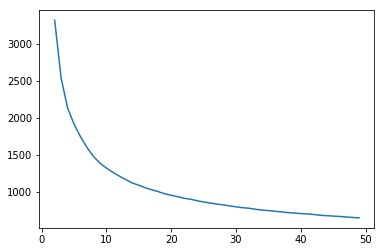

In [13]:
#how many clusters??
sse_list = list()
max_k = 50
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

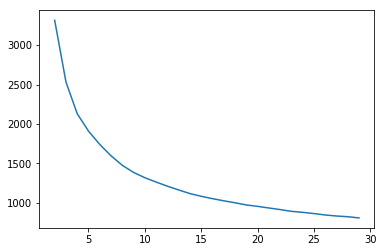

In [14]:
sse_list = list()
max_k = 30
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

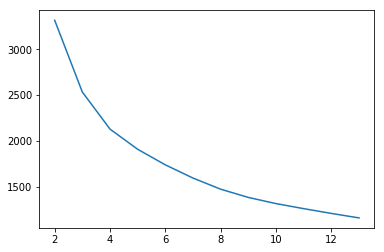

In [15]:
sse_list = list()
max_k = 14
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [16]:
# the ideal number of clusters is not clear
# maybe it's better hierarchycal clustering before the kmeans

In [17]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

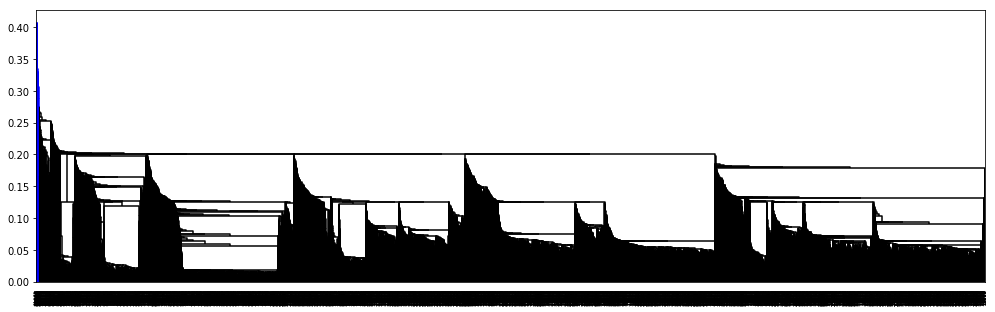

In [18]:
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
plt.figure(figsize=(17,5))
res = dendrogram(data_link)
plt.show()
# this sucks

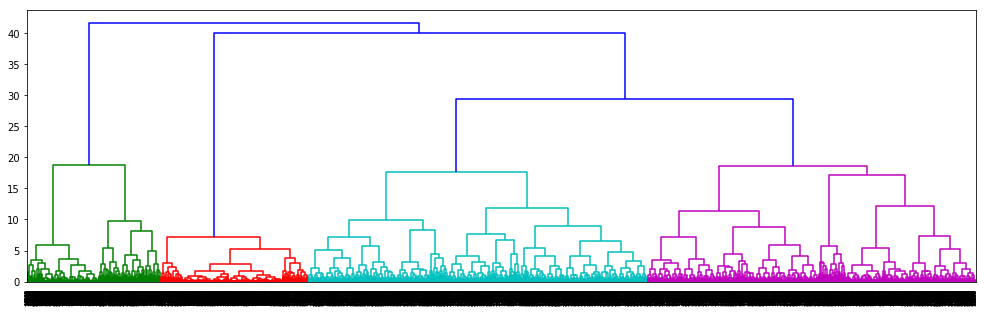

In [19]:
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
plt.figure(figsize=(17,5))
res = dendrogram(data_link)
plt.show()
# this is pretty! 4 clusters

In [20]:
# let's study this one

In [21]:
ward = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

labels {0: 2113, 1: 5184, 2: 2345, 3: 5357}
silhouette 0.231220448313


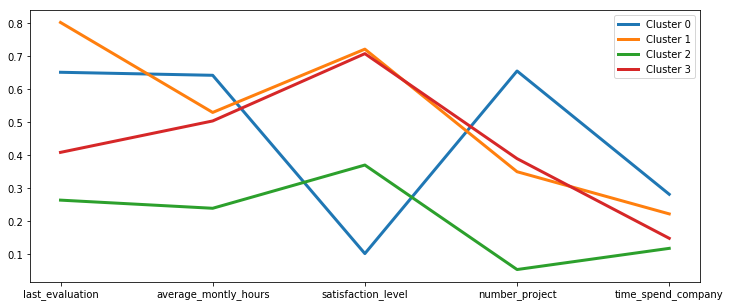

In [22]:
# I'm calculating centroids
train_ward = train_data.copy()
train_ward['labels'] = ward.labels_
centers = list()
for value in set(train_ward['labels']):
    center = list()
    for column in train_ward.columns:
        if(column != 'labels'):
            center.append(train_ward[train_ward['labels'] == value][column].mean())
    center = np.array(center)
    centers.append(center)
centers = np.array(centers)

# I'm plotting centroids, I want to compare this plot with the kmeans' with k=4
plt.figure(figsize=(12, 5))
for i in range(0, 4):
    plt.plot(range(0, 5), centers[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 5), list(train_ward.columns))
plt.legend()
plt.show()

In [23]:
# cluster 0 = hard workers, similar to the previous one
# cluster 1 = perfect workers
# cluster 2 = lazy boys, similar to the previous one
# cluster 3 = low evaluated workers, is actually similar to cluster 1, it differs from that just in last_evaluation

In [24]:
df_ward = df
df_ward['labels'] = ward.labels_
left_xt = pd.crosstab(df_ward['left'], df_ward['labels'])
left_xt

labels,0,1,2,3
left,,,,
0,1127,4240,823,5238
1,986,944,1522,119


In [25]:
986/2113, 944/5184, 1522/2345, 119/5357

(0.46663511594888785,
 0.18209876543209877,
 0.6490405117270789,
 0.022213925704685458)

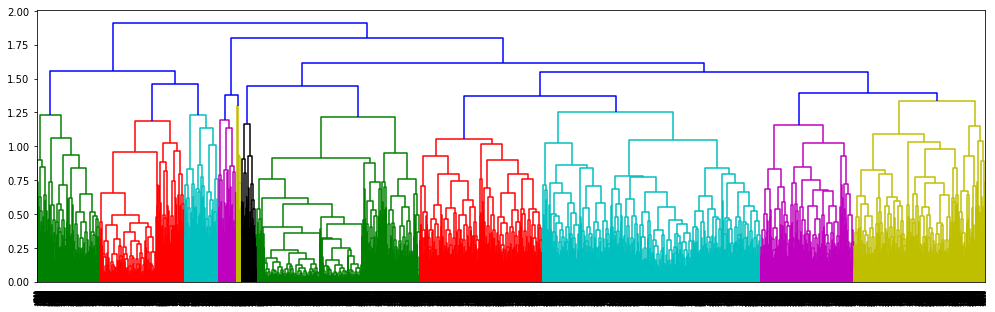

In [26]:
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
plt.figure(figsize=(17,5))
res = dendrogram(data_link)
plt.show()
# not so pretty... 11 clusters

In [27]:
#I'd try first with 4

In [28]:
train_4cl = train_data.copy()
kmeans = KMeans(n_clusters = 4)
kmeans.fit(train_4cl)
centers_kmeans = kmeans.cluster_centers_

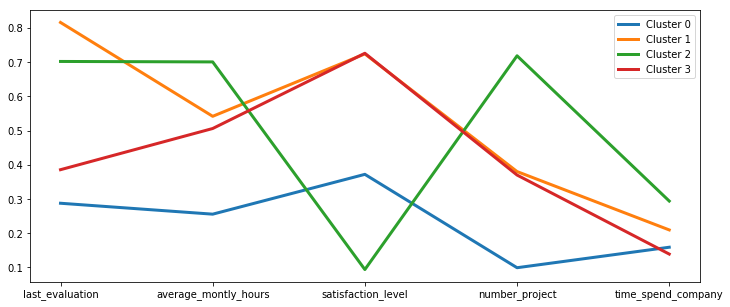

In [29]:
plt.figure(figsize=(12, 5))
for i in range(0, 4):
    plt.plot(range(0, 5), centers_kmeans[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 5), list(train_4cl.columns))
plt.legend()
plt.show()

In [30]:
# cluster 0 = previous cluster 0
# cluster 1 = previous cluster 2
# cluster 2 = previous cluster 1
# cluster 3 = previous cluster 3

In [31]:
df_4cl = df.copy()
df_4cl['labels'] = kmeans.labels_

In [32]:
print('silhouette', silhouette_score(train_4cl, kmeans.labels_))
print('SSE', kmeans.inertia_)
df_4cl['labels'].value_counts()

# 4 clusters with hierarchycal:
# labels {0: 2113, 1: 5184, 2: 2345, 3: 5357}
# silhouette 0.231220448313
## there are some differences

silhouette 0.266649107851
SSE 2129.33175444


1    5301
3    4762
0    3092
2    1844
Name: labels, dtype: int64

In [33]:
left_xt = pd.crosstab(df_4cl['left'], df_4cl['labels'])
left_xt

# labels        0     1      2      3
# left
#
#  0        1127   4240    823   5238
#  1         986    944   1522    119

labels,0,1,2,3
left,,,,
0,1531,4353,879,4665
1,1561,948,965,97


In [34]:
# no relevant differences

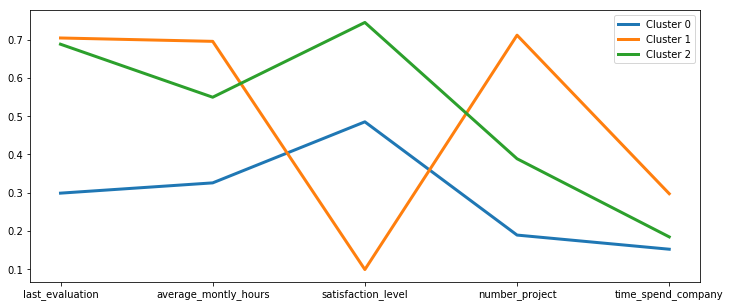

In [35]:
# let's try with 3
train_3cl = train_data.copy()
kmeans = KMeans(n_clusters = 3)
kmeans.fit(train_3cl)

centers_kmeans = kmeans.cluster_centers_
plt.figure(figsize=(12, 5))
for i in range(0, 3):
    plt.plot(range(0, 5), centers_kmeans[i], label='Cluster %s' % i, linewidth=3)
plt.xticks(range(0, 5), list(train_3cl.columns))
plt.legend()
plt.show()

In [36]:
df_3cl = df.copy()
df_3cl['labels'] = kmeans.labels_

print('silhouette', silhouette_score(train_3cl, kmeans.labels_))
print('SSE', kmeans.inertia_)

df_3cl['labels'].value_counts()

silhouette 0.282488014015
SSE 2533.13066613


2    7977
0    5139
1    1883
Name: labels, dtype: int64

In [37]:
left_xt = pd.crosstab(df_3cl['left'], df_3cl['labels'])
left_xt

labels,0,1,2
left,,,
0,3520,918,6990
1,1619,965,987


In [38]:
1612/4989, 993/8126, 966/1884

(0.32311084385648425, 0.12220034457297563, 0.5127388535031847)

In [ ]:
# DBSCAN
# What eps and min_pts?

In [ ]:
min_exp_minpts = 2
max_exp_minpts = 5
min_eps = 0.05
max_mult_eps = 8
step = 0.05

plt.figure(figsize=(12, 5))
for k in range(min_exp_minpts, max_exp_minpts + 1):
    silhouette_list = list()
    for j in range(0, max_mult_eps):
        dbscan = DBSCAN(eps = min_eps + j*step, min_samples = 2**k, metric = 'euclidean')
        dbscan.fit(train_data)
        silhouette_list.append(silhouette_score(train_data, dbscan.labels_))
    plt.plot([min_eps + j*step for j in range(max_mult_eps)], silhouette_list)

plt.legend(('min_pts = 4', 'min_pts = 8', 'min_pts = 16', 'min_pts = 32'), loc = 'best')
plt.ylabel('silhouette')
plt.xlabel('eps')
plt.show()

In [ ]:
# I think that the best value for eps is min_eps + step*4 = 0.5 + 0.5*4 = 0.25
dbscan = DBSCAN(eps = 0.25, min_samples = 4, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('min_pts = 4')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.25, min_samples = 8, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('min_pts = 8')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.25, min_samples = 16, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('min_pts = 16')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.25, min_samples = 32, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('min_pts = 32')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

In [ ]:
14764/14999

In [ ]:
# just one relevant cluster ---> shit
# let's try other parameters, despite a very low silhouette

In [ ]:
dbscan = DBSCAN(eps = 0.20, min_samples = 4, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.20, min_pts = 4')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.15, min_samples = 8, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.15, min_pts = 8')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.15, min_samples = 16, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.15, min_pts = 16')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.15, min_samples = 32, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.15, min_pts = 32')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

In [ ]:
# even worst than before, too many clusters in every case!

In [ ]:
dbscan = DBSCAN(eps = 0.225, min_samples = 4, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.225, min_pts = 4')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.20, min_samples = 8, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.20, min_pts = 8')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.20, min_samples = 16, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.20, min_pts = 16')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

dbscan = DBSCAN(eps = 0.225, min_samples = 4, metric = 'euclidean')
dbscan.fit(train_data)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print ('eps = 0.05, min_pts = 32')
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, dbscan.labels_))

In [93]:
# OK.... DBSCAN is useless!!